Read and plot all the variables in the raw seasonal reforecast from the combined kerchunk index.

In [1]:
import xarray as xr
import cf_xarray # This is a wrapper for xarray that allows access to the data through standard coordinate names
import fsspec
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import numpy as np
import math

Plot all members of all the variables sos, tob, and tos

In [2]:
fs = fsspec.filesystem(
    "reference", 
    fo='s3://noaa-oar-cefi-regional-mom6-pds/northwest_atlantic/full_domain/seasonal_reforecast/monthly/raw/r20250212/all.json',
    remote_protocol="s3", 
    remote_options={"anon":True},
    skip_instance_cache=True,
    target_options={"anon": True}
)
m = fs.get_mapper()
all = xr.open_dataset(m, engine='zarr', consolidated=False)
all

<xarray.Dataset> Size: 113GB
Dimensions:    (init_time: 120, lead: 12, member: 5, yh: 845, xh: 775)
Coordinates:
    init       (init_time) datetime64[ns] 960B ...
  * init_time  (init_time) datetime64[ns] 960B 1994-02-01 ... 2023-12-01
  * lead       (lead) int64 96B 0 1 2 3 4 5 6 7 8 9 10 11
  * member     (member) int32 20B 1 2 3 4 5
    month      (init_time) float64 960B ...
  * xh         (xh) float64 6kB -98.0 -97.92 -97.84 ... -36.24 -36.16 -36.08
  * yh         (yh) float64 7kB 5.273 5.352 5.432 5.511 ... 51.9 51.91 51.93
Data variables:
    sos        (init_time, member, lead, yh, xh) float32 19GB ...
    sos_anom   (init_time, member, lead, yh, xh) float32 19GB ...
    tob        (init_time, member, lead, yh, xh) float32 19GB ...
    tob_anom   (init_time, member, lead, yh, xh) float32 19GB ...
    tos        (init_time, member, lead, yh, xh) float32 19GB ...
    tos_anom   (init_time, member, lead, yh, xh) float32 19GB ...
Attributes: (12/25)
    associated_files:       areacello: 19940201.ocean_static.nc
    cefi_archive_version:   /archive/Andrew.C.Ross/fre/NWA/2024_09/NWA12_coba...
    cefi_aux:               archive format yyyy-mm-e## represents the initial...
    cefi_data_doi:          10.5281/zenodo.10642295
    cefi_date_range:        N/A
    cefi_ensemble_info:     enss
    ...                     ...
    cefi_run_xml:           N/A
    cefi_subdomain:         full
    cefi_variable:          sos
    grid_tile:              N/A
    grid_type:              regular
    title:                  NWA12_cobalt_forecast_2024_09_1994-02-e01

In [3]:
fs = fsspec.filesystem(
    "reference", 
    fo='s3://noaa-oar-cefi-regional-mom6-pds/northwest_atlantic/full_domain/seasonal_reforecast/monthly/raw/r20250212/ocean_static.json',
    remote_protocol="s3", 
    remote_options={"anon":True},
    skip_instance_cache=True,
    target_options={"anon": True}
)
m = fs.get_mapper()
grid = xr.open_dataset(m, engine='zarr', consolidated=False)
grid

<xarray.Dataset> Size: 66MB
Dimensions:       (yq: 846, xq: 776, yh: 845, xh: 775, time: 1)
Coordinates:
  * time          (time) datetime64[ns] 8B 1980-01-01
  * xh            (xh) float64 6kB -98.0 -97.92 -97.84 ... -36.24 -36.16 -36.08
  * xq            (xq) float64 6kB -98.04 -97.96 -97.88 ... -36.2 -36.12 -36.04
  * yh            (yh) float64 7kB 5.273 5.352 5.432 5.511 ... 51.9 51.91 51.93
  * yq            (yq) float64 7kB 5.233 5.312 5.392 5.472 ... 51.9 51.92 51.94
Data variables: (12/25)
    Coriolis      (yq, xq) float32 3MB ...
    areacello     (yh, xh) float32 3MB ...
    areacello_bu  (yq, xq) float32 3MB ...
    areacello_cu  (yh, xq) float32 3MB ...
    areacello_cv  (yq, xh) float32 3MB ...
    deptho        (yh, xh) float32 3MB ...
    ...            ...
    geolon_v      (yq, xh) float32 3MB ...
    sftof         (yh, xh) float32 3MB ...
    wet           (yh, xh) float32 3MB ...
    wet_c         (yq, xq) float32 3MB ...
    wet_u         (yh, xq) float32 3MB ...
    wet_v         (yq, xh) float32 3MB ...
Attributes:
    NCO:             netCDF Operators version 5.0.1 (Homepage = http://nco.sf...
    NumFilesInSet:   1
    cefi_paper_doi:  10.5194/os-20-1631-2024
    grid_tile:       N/A
    grid_type:       regular
    history:         Fri May 12 10:50:21 2023: ncks -4 -L 3 ocean_static.nc c...
    title:           NWA12_MOM6_v1.0

In [4]:
ds = xr.merge([all,grid])

In [5]:
selected_time = '2003-06-01'
selected_lead = 0
selection = ds.sel(init_time=selected_time, lead=selected_lead)
selection = selection.squeeze()
selection

<xarray.Dataset> Size: 144MB
Dimensions:       (member: 5, yh: 845, xh: 775, yq: 846, xq: 776)
Coordinates:
    init          datetime64[ns] 8B ...
    init_time     datetime64[ns] 8B 2003-06-01
    lead          int64 8B 0
  * member        (member) int32 20B 1 2 3 4 5
    month         float64 8B ...
  * xh            (xh) float64 6kB -98.0 -97.92 -97.84 ... -36.24 -36.16 -36.08
  * yh            (yh) float64 7kB 5.273 5.352 5.432 5.511 ... 51.9 51.91 51.93
    time          datetime64[ns] 8B 1980-01-01
  * xq            (xq) float64 6kB -98.04 -97.96 -97.88 ... -36.2 -36.12 -36.04
  * yq            (yq) float64 7kB 5.233 5.312 5.392 5.472 ... 51.9 51.92 51.94
Data variables: (12/31)
    sos           (member, yh, xh) float32 13MB ...
    sos_anom      (member, yh, xh) float32 13MB ...
    tob           (member, yh, xh) float32 13MB ...
    tob_anom      (member, yh, xh) float32 13MB ...
    tos           (member, yh, xh) float32 13MB ...
    tos_anom      (member, yh, xh) float32 13MB ...
    ...            ...
    geolon_v      (yq, xh) float32 3MB ...
    sftof         (yh, xh) float32 3MB ...
    wet           (yh, xh) float32 3MB ...
    wet_c         (yq, xq) float32 3MB ...
    wet_u         (yh, xq) float32 3MB ...
    wet_v         (yq, xh) float32 3MB ...
Attributes: (12/25)
    associated_files:       areacello: 19940201.ocean_static.nc
    cefi_archive_version:   /archive/Andrew.C.Ross/fre/NWA/2024_09/NWA12_coba...
    cefi_aux:               archive format yyyy-mm-e## represents the initial...
    cefi_data_doi:          10.5281/zenodo.10642295
    cefi_date_range:        N/A
    cefi_ensemble_info:     enss
    ...                     ...
    cefi_run_xml:           N/A
    cefi_subdomain:         full
    cefi_variable:          sos
    grid_tile:              N/A
    grid_type:              regular
    title:                  NWA12_cobalt_forecast_2024_09_1994-02-e01

In [6]:
xmin = selection['geolon'].min()
xmax = selection['geolon'].max()
ymin = selection['geolat'].min()
ymax = selection['geolat'].max()

In [7]:
vars = ['sos', 'tob', 'tos']
c_levels = {}
for var in vars:
    dmin = math.floor(selection[var].min())
    dmax = math.ceil(selection[var].max())
    delta = int(math.ceil((dmax-dmin)/256.))
    c_levels[var] = np.arange(dmin,dmax,delta)

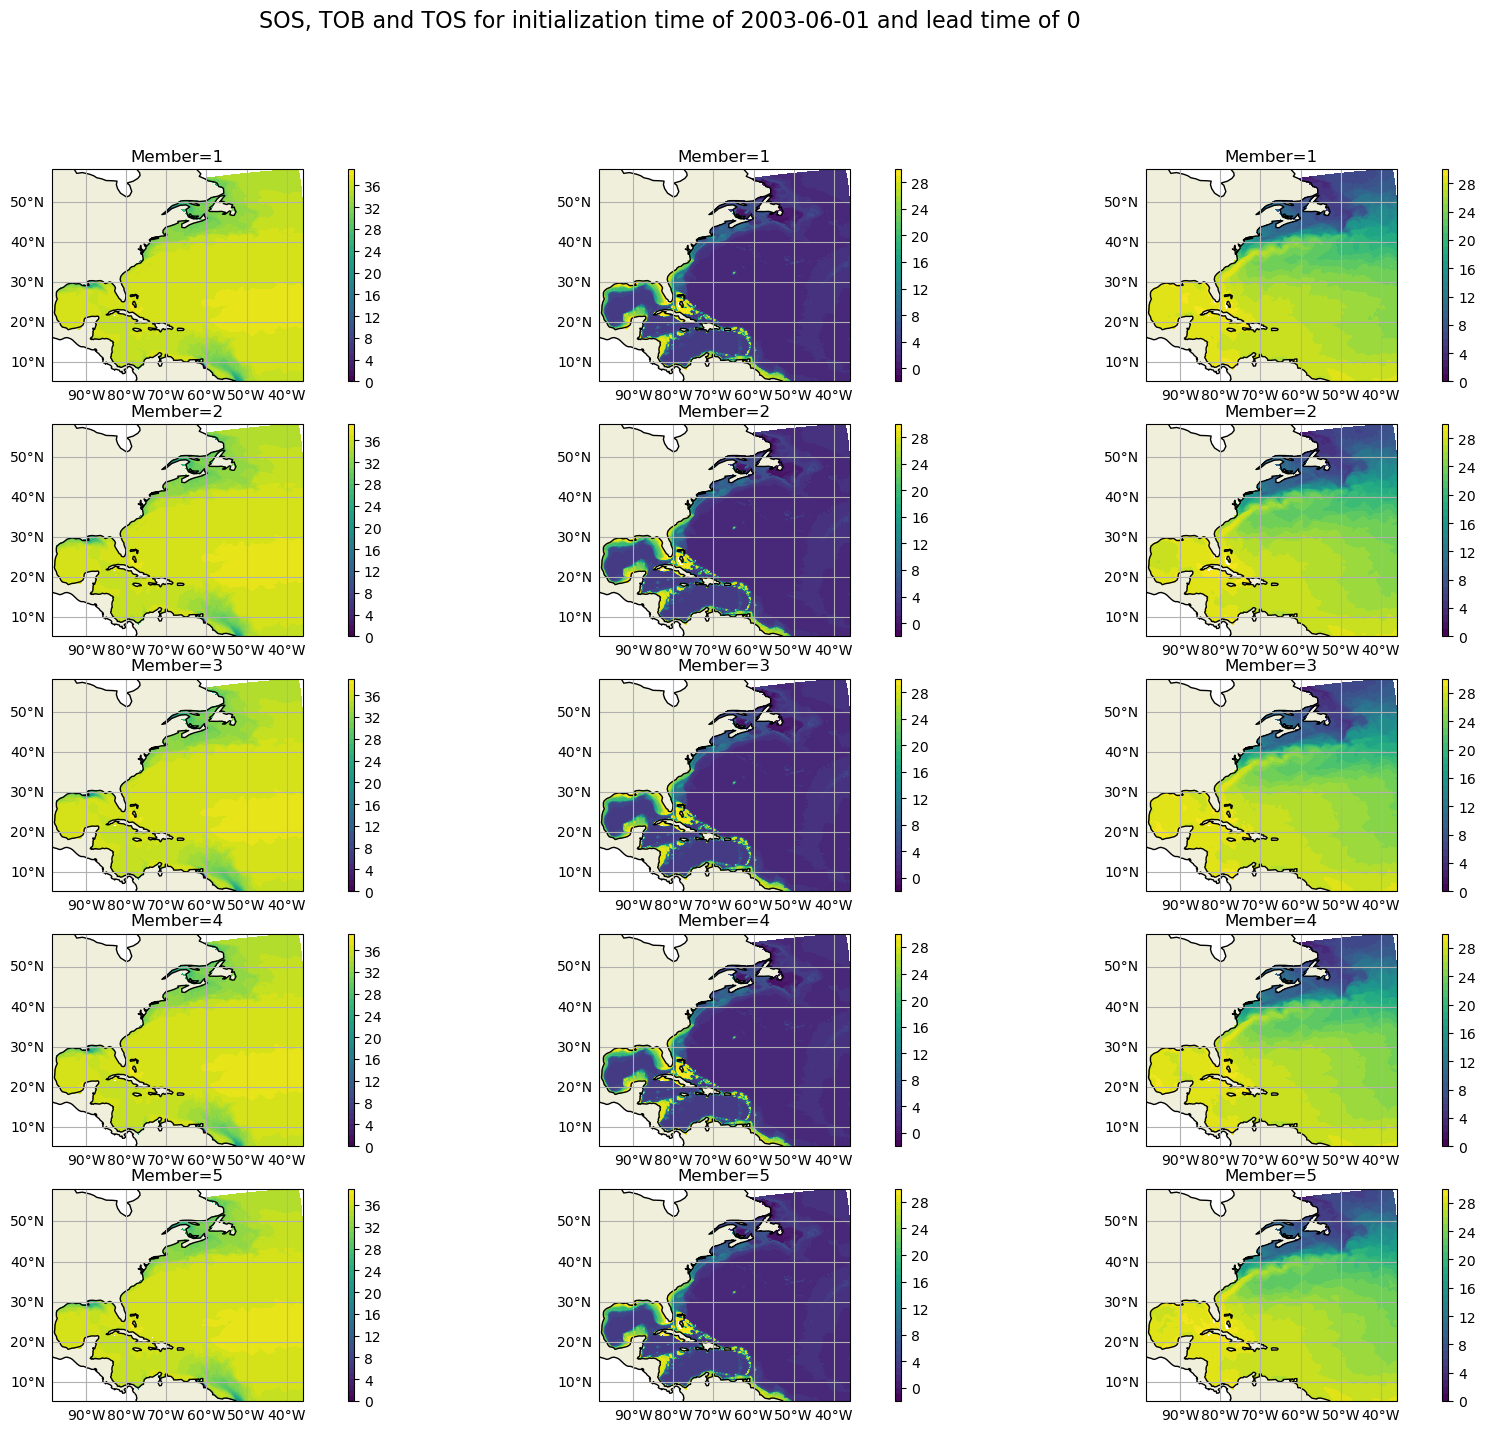

In [9]:
proj = ccrs.PlateCarree()
fig, axs = plt.subplots(nrows=5,ncols=3, subplot_kw={'projection': proj}, figsize=(20,16))
axs=axs.flatten()
plot_index = 0
for member in selection.member.values:
    for var in vars:
        ax = axs[plot_index]
        ax.set_extent([xmin, xmax, ymin, ymax], proj)
        ax.add_feature(cartopy.feature.LAND)
        ax.coastlines()
        ax.set_title(f'Member={member}')
        gl = ax.gridlines(draw_labels=True)
        gl.top_labels = False
        gl.right_labels = False
        data = selection.sel(member=member)
        ct = ax.contourf(selection['geolon'], selection['geolat'], data[var], levels=c_levels[var], transform=proj, cmap="viridis")
        plt.colorbar(ct, orientation='vertical',pad=0.1, aspect=35, fraction=.06, location='right')
        plot_index = plot_index + 1
fig.suptitle(f'SOS, TOB and TOS for initialization time of {selected_time} and lead time of {selected_lead}', fontsize=16)
plt.show()